In [2]:
#converts image to gray, blurs it, and applies an edge operation
#all images are show simultaneously
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('rocket_test.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (5,5), 0)


sobely = cv2.Sobel(blur,cv2.CV_32F,0,1,ksize=1)
sobely = np.absolute(sobely)
sobely = np.uint8(sobely)

sobelx = cv2.Sobel(blur,cv2.CV_32F,1,0,ksize=1)
sobelx = np.absolute(sobelx)
sobelx = np.uint8(sobelx)

contrast1 = gray.copy()
contrast2 = gray.copy()
contrast3 = gray.copy()
for y in range(gray.shape[0]):
    for x in range(gray.shape[1]):
        contrast1[y, x] = np.clip(1.5 * gray[y, x] - 125, 0, 255)
        contrast2[y, x] = np.clip(1.75 * gray[y, x] - 125, 0, 255)
        contrast3[y, x] = np.clip(2.0 * gray[y, x] - 125, 0, 255)

blur2 = cv2.GaussianBlur(contrast1, (5, 5), 0)
laplacian = cv2.Laplacian(blur2, cv2.CV_64F)
        
cv2.imshow('Original image',image)
cv2.imshow('Contrast * 1.5', contrast1)
cv2.imshow('Contrast * 1.75', contrast2)
cv2.imshow('Contrast * 2.0', contrast3)
cv2.imshow('Gray image', gray)
cv2.imshow('Blur', blur)
cv2.imshow('Sobel Y', sobely)
cv2.imshow('Laplacian of Gaussian', laplacian)
cv2.imshow('Sobel X', sobelx)


cv2.waitKey(0)
cv2.destroyAllWindows()

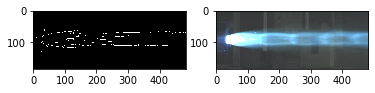

In [5]:
#blurred image with Canny edge detection
#not switched from BGR to RGB
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('rocket_test.jpg')
blur = cv2.GaussianBlur(image, (5,5), 0)
edges = cv2.Canny(blur, 0,100)
plt.subplot(121),plt.imshow(edges, cmap = 'gray')
plt.subplot(122),plt.imshow(image)
plt.savefig('edge_test2.jpg')
#plt.show()

In [3]:
#converts image to HSV format
#masks the image between upper and lower thresholds
#displays image after masking
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('rocket_test.jpg')
blur = cv2.GaussianBlur(image, (5, 5), 0)
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
 
lower = [18, 50, 50]
upper = [35, 255, 255]
lower = np.array(lower, dtype="uint8")
upper = np.array(upper, dtype="uint8")
mask = cv2.inRange(hsv, lower, upper)
 
 
output = cv2.bitwise_and(image, hsv, mask=mask)
cv2.imshow("output", output)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter

#function that displays the k most dominant colors in the image
def get_dominant_color(image, k=4, image_processing_size = None):
	"""
	takes an image as input and returns the dominant color in the image as a list
	
	dominant color is found by performing k means on the pixel colors and returning the centroid
	of the largest cluster
	processing time is sped up by working with a smaller image; this can be done with the 
	image_processing_size param which takes a tuple of image dims as input
	>>> get_dominant_color(my_image, k=4, image_processing_size = (25, 25))
	[56.2423442, 34.0834233, 70.1234123]
	"""
	#resize image if new dims provided
	if image_processing_size is not None:
		image = cv2.resize(image, image_processing_size, interpolation = cv2.INTER_AREA)
	
	#reshape the image to be a list of pixels
	image = image.reshape((image.shape[0] * image.shape[1], 3))

	#cluster the pixels and assign labels
	clt = KMeans(n_clusters = k)
	labels = clt.fit_predict(image)

	#count labels to find most popular
	label_counts = Counter(labels)

	#subset out most popular centroid
	dominant_colors = []
	for i in range(k):
		dominant_colors.append(list(clt.cluster_centers_[label_counts.most_common(k)[i][0]]))
	#dominant_color = clt.cluster_centers_[label_counts.most_common(1)[0][0]]

#	return list(dominant_color)
	return dominant_colors

#for i in len(get_dominant_color('rocket_test2.jpg', k=10)):
#    print(get_dominant_color('rocket_test2.jpg', k=10))[i]   
    
#read in image of interest
bgr_image = cv2.imread('rocket_test2.jpg')
#convert to HSV; this is a better representation of how we see color
hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)

#extract dominant color 
# (aka the centroid of the most popular k means cluster)
k = 15
dom_color = get_dominant_color(hsv_image, k=k)

for i in range(k):
    #create a square showing dominant color of equal size to input image
    dom_color_hsv = np.full(bgr_image.shape, dom_color[i], dtype='uint8')
    #convert to bgr color space for display
    dom_color_bgr = cv2.cvtColor(dom_color_hsv, cv2.COLOR_HSV2BGR)
    dom_color_bgr = cv2.resize(dom_color_bgr, (62,62))
    bgr_image = np.concatenate((bgr_image, dom_color_bgr), axis = 1)
#concat input image and dom color square side by side for display
#output_image = np.hstack((bgr_image, col))

#show results to screen
cv2.imshow('Image Dominant Color', bgr_image)
cv2.waitKey(0)

13

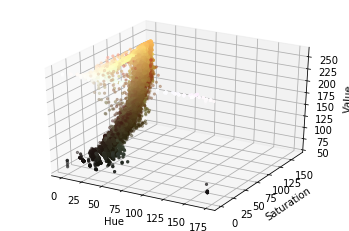

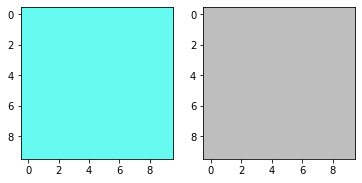

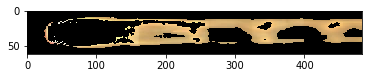

In [4]:
#creates a scatter plot of the pixels in HSV space colored by their original colors
#also displays the colors of light and dark values in the image
#then displays masked image based on the light and dark values
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

image = cv2.imread('rocket_test2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixel_colors = image.reshape((np.shape(image)[0]*np.shape(image)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

hsv_rocket = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_rocket)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors = pixel_colors, marker = ".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

light = (-1, 0, 190)
dark = (125, 150, 250)
lo_square = np.full((10, 10, 3), light, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1),plt.imshow(colors.hsv_to_rgb(do_square))
plt.subplot(1,2,2),plt.imshow(colors.hsv_to_rgb(lo_square))
plt.show()

mask = cv2.inRange(hsv_rocket, light, dark)
result = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(mask, cmap="gray")
plt.imshow(result)
plt.show()

In [1]:
#maps color to another color based on a power and creates a scatter plot
#tries to help identify really bright colors
#also displays light and dark images
#shows the mapped, binary, and masked images side-by-side
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

invGamma = 25.0
table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
 
# apply gamma correction using the lookup table
pic = cv2.imread('rocket_test2.jpg')
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
gam = cv2.LUT(pic, table)

pixel_colors = gam.reshape((np.shape(gam)[0]*np.shape(gam)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

hsv_rocket = cv2.cvtColor(gam, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_rocket)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors = pixel_colors, marker = ".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

light = (0, 0, 150)
dark = (100, 300, 300)
lo_square = np.full((10, 10, 3), light, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(colors.hsv_to_rgb(do_square))
plt.subplot(1,2,2)
plt.imshow(colors.hsv_to_rgb(lo_square))
plt.show()

mask = cv2.inRange(hsv_rocket, light, dark)
result = cv2.bitwise_and(gam, gam, mask=mask)
f = plt.figure(figsize=(50, 30))
ax1 = f.add_subplot(131)
ax1.imshow(gam)
ax2 = f.add_subplot(132)
ax2.imshow(mask, cmap="gray")
ax3 = f.add_subplot(133)
ax3.imshow(result)




<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 2 Axes>

In [4]:
#applies the sobel operator to the flame for each frame
import cv2
import numpy as np
 
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('Test02Cam02.avi')
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frameqqq
  ret, frame = cap.read()
  if ret == True:
    blur = cv2.GaussianBlur(frame, (5,5), 0)
    sobely = cv2.Sobel(blur,cv2.CV_32F,1,0,ksize=1)
    sobely = np.absolute(sobely)
    sobely = np.uint8(sobely)
 
    # Display the resulting frame
    cv2.imshow('Original', frame)
    cv2.imshow('Sobel',sobely)
 
    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
 
  # Break the loop
  else:
    break

# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

In [1]:
#applies the canny operator to the flame for each frame
import cv2
import numpy as np
 
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('Test02Cam02.avi')
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:

    blur = cv2.GaussianBlur(frame, (5,5), 0)
    edges = cv2.Canny(blur, 0, 100)
 
    # Display the resulting frame
    cv2.imshow('Original', frame)
    cv2.imshow('Edges',edges)
 
    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
 
  # Break the loop
  else: 
    break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

In [6]:
#maps each frame to a different color based on three different mappings
#used to identify intensity
import cv2
import numpy as np
 
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('Test02Cam02.avi')
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:

    color_hot = cv2.applyColorMap(frame, cv2.COLORMAP_HOT)
    color_hsv = cv2.applyColorMap(frame, cv2.COLORMAP_HSV)
    color_autumn = cv2.applyColorMap(frame, cv2.COLORMAP_AUTUMN)
 
    # Display the resulting frame
    cv2.imshow('Original', frame)
    cv2.imshow('Color',color_hot)
    cv2.imshow('HSV', color_hsv)
    cv2.imshow('Autumn', color_autumn)
    
 
    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
 
  # Break the loop
  else: 
    break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

In [7]:
#HSV version of the flame, frame by frame
import cv2
import numpy as np
 
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('Test02Cam02.avi')
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:

    frame2 = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
 
    # Display the resulting frame
    cv2.imshow('Original', frame)
    cv2.imshow('HSV', frame2)
    
 
    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
 
  # Break the loop
  else: 
    break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

In [5]:
# another masking of the rocket image to help locate diamonds
import cv2
import numpy as np

pic = cv2.imread('rocket_test2.jpg')
hsv_rocket = cv2.cvtColor(pic, cv2.COLOR_BGR2HSV)

#lower = np.uint8([[[51,0,0]]])
#upper = np.uint8([[[247,255,230]]])
#hsv_lower = cv2.cvtColor(lower,cv2.COLOR_RGB2HSV)
#hsv_upper = cv2.cvtColor(upper,cv2.COLOR_RGB2HSV)

#yellow = np.uint8([[[255,255,255]]])
#hsv_yellow = cv2.cvtColor(yellow,cv2.COLOR_BGR2HSV)
#print(hsv_yellow)

lower = np.array([0,0,255])
upper = np.array([100,200,255])

mask = cv2.inRange(hsv_rocket, lower, upper)
result = cv2.bitwise_and(pic, pic, mask=mask)
cv2.imshow('Original', pic)
cv2.imshow('Mask', mask)
cv2.imshow('Result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
#average flame over time
#can also be used to extract final average flame
import cv2

(rAvg, gAvg, bAvg) = (None, None, None)
total = 0

# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('Test02Cam02.avi')
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:

    (B, G, R) = cv2.split(frame.astype("float"))
    
    if rAvg is None:
        rAvg = R
        bAvg = B
        gAvg  = G
    else:
        rAvg = ((total * rAvg) + (1 * R)) / (total + 1.0)
        gAvg = ((total * gAvg) + (1 * G)) / (total + 1.0)
        bAvg = ((total * bAvg) + (1 * B)) / (total + 1.0)
        
    total += 1
    
    avg = cv2.merge([bAvg, gAvg, rAvg]).astype("uint8")
    cv2.imshow("Frame", frame)
    cv2.imshow("Average", avg)
    
    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
 
  # Break the loop
  else: 
    break
    
cv2.imwrite("average.jpg", avg)
 
# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

In [ ]:
#calculates the differences between a frame and the average frame
#two ways: binary and otsu threshold
from skimage.measure import compare_ssim
import cv2

# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('Test02Cam02.avi')
avg = cv2.imread("average.jpg", 0)
min_score = 1
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
   
    #avg = cv2.cvtColor(avg, cv2.COLOR_BGR2GRAY)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    (score, diff) = compare_ssim(avg, frame, full = True, multichannel = True)

    if score < min_score:
        min_score = score
        max_diff_frame = frame
    
    diff = (diff * 255).astype("uint8")
    thresh = cv2.threshold(diff, 0, 255, 
                          cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    
#     cv2.imshow('Video', frame)
#     cv2.imshow("Diff", diff)
#     cv2.imshow("Thresh", thresh)
    
    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
 
  # Break the loop
  else: 
    break
 
# When everything done, release the video capture object
cap.release()
 
cv2.imshow('Most different frame', max_diff_frame)
# cv2.imwrite('./anomaly_frame.jpg', max_diff_frame)
cv2.waitKey(0)
# Closes all the frames
cv2.destroyAllWindows()

c:\users\shado\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:24: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [ ]:
#determines the average number of white and black pixels after thresholding
#can be use to determine percentages of white and black
import cv2
import numpy as np

original = cv2.imread("average.jpg")

gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

(thresh, bw) = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY)

n_white_pix = np.sum(bw == 255)
print('Number of white pixels:', n_white_pix)
n_black_pix = np.sum(bw == 0)
print('Number of black pixels:', n_black_pix)
total_pix = n_white_pix + n_black_pix
print('Total number of pixels:', total_pix)

cv2.imshow('Black white', bw)
cv2.imshow('Original',original)

cv2.waitKey(0)
cv2.destroyAllWindows()

Number of white pixels: 104875
Number of black pixels: 157269
Total number of pixels: 262144


In [1]:
#threshold frame in binary form compared to the original
import cv2
import numpy as np
 
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('Test02Cam02.avi')
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    (thresh, bw) = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY)
    n_white_pix = np.sum(bw == 255)
    n_black_pix = np.sum(bw == 0)
    total_pix = n_white_pix + n_black_pix
    
    cv2.imshow('Black white', bw)
    cv2.imshow('Original',frame)
    
    #print(n_white_pix / total_pix)
    
 
    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
 
  # Break the loop
  else: 
    break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

In [14]:
# uses gamma coloring and masking from above and then multiple edge/blob detection techniques to try to extract shocks
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

invGamma = 4.0
table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
 
# apply gamma correction using the lookup table
pic = cv2.imread('rocket_test2.jpg')
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
gam = cv2.LUT(pic, table)

# SimpleBlobDetector parameter modification
params = cv2.SimpleBlobDetector_Params()
# Change thresholds
params.minThreshold = 50
# Filter by Area.
params.filterByArea = False
params.minArea = 10
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1
params.maxCircularity = 0.7
# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.50
params.maxConvexity = 0.75
# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0.01

# Create new blob detector and run on test image
detector = cv2.SimpleBlobDetector_create(params)

blob_test_img = cv2.imread('blob.jpg')
test_kps = detector.detect(blob_test_img)
test_kps_img = cv2.drawKeypoints(blob_test_img, test_kps, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow("test keypoints", test_kps_img)

light = (0, 0, 150)
dark = (100, 300, 300)
hsv_rocket = cv2.cvtColor(gam, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv_rocket, light, dark)
result = cv2.bitwise_and(gam, gam, mask=mask)

# process the gamma picture from rocket
gray = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
# blur = cv2.medianBlur(gray, 3)

kps = detector.detect(blur)
kps_img = cv2.drawKeypoints(blur, kps, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow("keypoints", kps_img)

# edge detectors
lap = cv2.Laplacian(blur, cv2.CV_64F)
sobelx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=1)
sobelx = np.absolute(sobelx)
sobelx = np.uint8(sobelx)

sobely = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=1)
sobely = np.absolute(sobely)
sobely = np.uint8(sobely)

canny = cv2.Canny(blur, 100, 150)

cv2.imshow("Original", pic)
cv2.imshow("Result", result)
cv2.imshow("Blur", blur)
cv2.imshow("Laplacian of Blur", lap)
cv2.imshow("Sobel X of Blur", sobelx)
cv2.imshow("Sobel Y of Blur", sobely)
cv2.imshow("Canny of Blur", canny)

cv2.imwrite("./first_img.jpg", pic)
cv2.imwrite("./sobelx.jpg", sobelx)
cv2.imwrite("./sobely.jpg", sobely)
cv2.imwrite("./laplacian.jpg", lap)
cv2.imwrite("./gamma_correction.jpg", result)
cv2.imwrite("./canny_edge_detect.jpg", canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# interesting link https://www.pyimagesearch.com/2016/10/31/detecting-multiple-bright-spots-in-an-image-with-python-and-opencv/

import cv2
import numpy as np
from skimage import measure
from imutils import contours
import imutils

invGamma = 4

table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
pic = cv2.imread('rocket_test2.jpg')
shocks = pic.copy()
gam = cv2.LUT(pic, table)

gray = cv2.cvtColor(gam, cv2.COLOR_RGB2GRAY)
cv2.normalize(gray, gray, 1.0, 255, cv2.NORM_MINMAX)
blur = cv2.GaussianBlur(gray, (11, 11), 0)

thresh = cv2.threshold(blur, 60, 255, cv2.THRESH_BINARY)[1]
cv2.imshow("Threshold stage 1", thresh)
thresh = cv2.erode(thresh, None, iterations=2)
cv2.imshow("Threshold stage 2", thresh)
thresh = cv2.dilate(thresh, None, iterations=3)
cv2.imshow("Threshold stage 3", thresh)

labels = measure.label(thresh, neighbors=8, background=0)
mask = np.zeros(thresh.shape, dtype='uint8')

for label in np.unique(labels):
    if label == 0:
        continue
    
    labelMask = np.zeros(thresh.shape, dtype='uint8')
    labelMask[labels == label] = 255
    numPixels = cv2.countNonZero(labelMask)
    
    if numPixels > 300:
        mask = cv2.add(mask, labelMask)
        
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = contours.sort_contours(cnts)[0]
# loop over the contours
for (i, c) in enumerate(cnts):
    # draw the bright spot on the image
    (x, y, w, h) = cv2.boundingRect(c)
    ((cX, cY), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(shocks, (int(cX), int(cY)), int(radius), (0, 0, 255), 3)
    cv2.putText(shocks, "#{}".format(i + 1), (x-25, y + 15),
        cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
# show the output image


cv2.imshow('Original', pic)
cv2.imshow('Gamma', gam)
cv2.imshow('Gray', gray)
cv2.imshow('Blur', blur)
cv2.imshow('Threshold', thresh)
cv2.imshow("Diamonds", shocks)

cv2.imwrite("./shock_thresholding.jpg", thresh)
cv2.imwrite("./shock_circles.jpg", shocks)

cv2.waitKey(0)
cv2.destroyAllWindows()


c:\users\shado\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:27: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2


In [1]:
import cv2
import numpy as np

pic = cv2.imread('rocket_test2.jpg')
cv2.imshow("Pic1", pic)

hsv = cv2.cvtColor(pic, cv2.COLOR_BGR2HSV)
blur = cv2.GaussianBlur(pic, (5, 5), 3);
sharp = cv2.addWeighted(pic, 3, blur, -2, 0)
cv2.imshow("Sharp", sharp)
h, s, v = cv2.split(hsv)
max_v = np.amax(v)
# mask = 
# v[mask] = 0
shift_hsv = cv2.merge([h, s, v])
cv2.imshow("HSV Shift", shift_hsv)

cv2.waitKey(0)
cv2.destroyAllWindows()